In [50]:
from netCDF4 import Dataset

In [13]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np

In [15]:
%matplotlib inline

In [52]:
path = "/Users/weiguangwu/research/expansion_fans/data/ccmp/2010/01/analysis_20100101_v11l30flk.nc"

In [53]:
nc = Dataset(path,'r')

In [18]:
print dir(nc.variables)

['_OrderedDict__map', '_OrderedDict__marker', '_OrderedDict__root', '_OrderedDict__update', '__class__', '__cmp__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'clear', 'copy', 'fromkeys', 'get', 'has_key', 'items', 'iteritems', 'iterkeys', 'itervalues', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values', 'viewitems', 'viewkeys', 'viewvalues']


In [19]:
print nc.variables.keys()

[u'lon', u'lat', u'time', u'uwnd', u'vwnd', u'nobs']


In [20]:
print nc.variables['uwnd'].dimensions

(u'time', u'lat', u'lon')


In [21]:
print nc.variables['lon'][:]

[  1.25000000e-01   3.75000000e-01   6.25000000e-01 ...,   3.59375000e+02
   3.59625000e+02   3.59875000e+02]


In [22]:
uwnd = nc.variables['uwnd'][:]
vwnd = nc.variables['vwnd'][:]
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]

In [23]:
uwnd.shape

(4, 628, 1440)

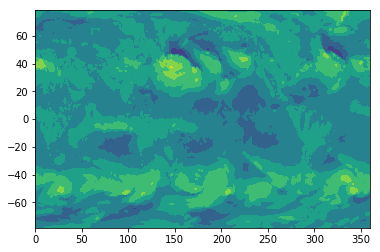

In [24]:
plt.contourf(lon, lat, uwnd[1])

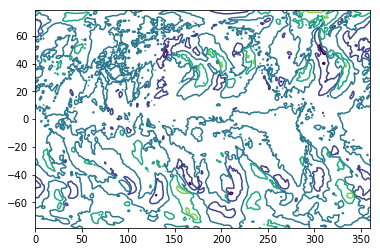

In [25]:
plt.contour(lon, lat, vwnd[1])

In [26]:
u_mean = np.ma.mean(uwnd,axis = 0)

In [27]:
u_mean.shape

(628, 1440)

<IPython.core.display.Javascript object>


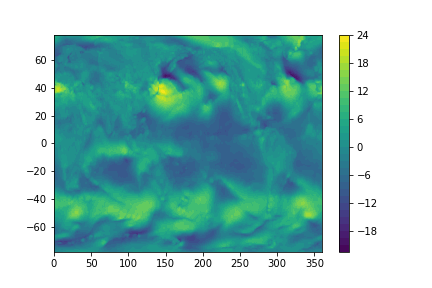

In [88]:
%matplotlib notebook
plt.contourf(lon,lat,u_mean,30)
plt.colorbar()

In [29]:
U = (uwnd*2+vwnd*2)*1/2

In [30]:
U.shape

(4, 628, 1440)

In [31]:
U_mean = np.ma.mean(U,axis= 0)

In [32]:
U_mean.shape

(628, 1440)

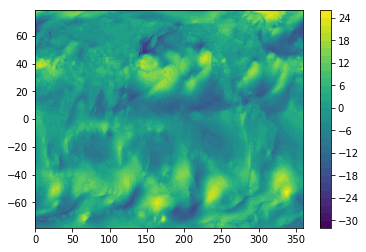

In [33]:
plt.contourf(lon,lat,U_mean,30)
plt.colorbar()

# things to show

In [68]:
import glob
from netCDF4 import MFDataset

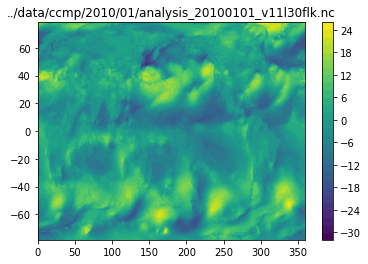

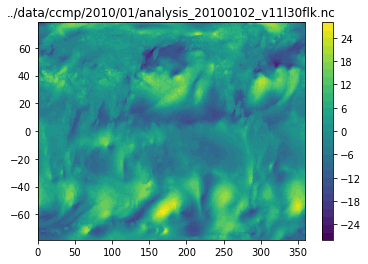

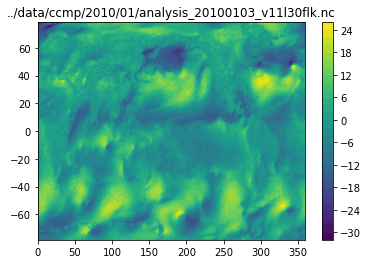

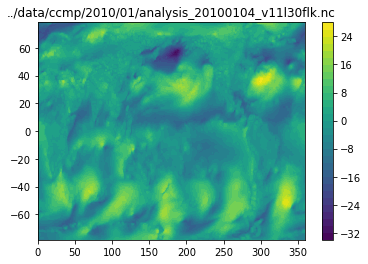

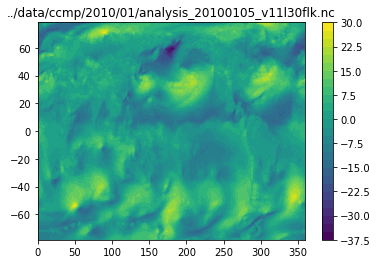

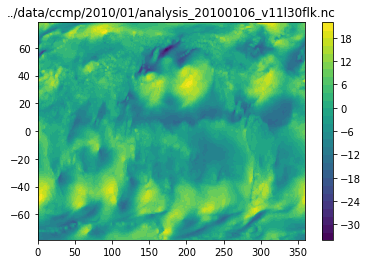

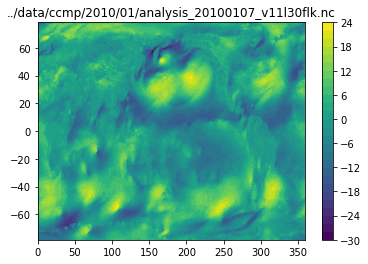

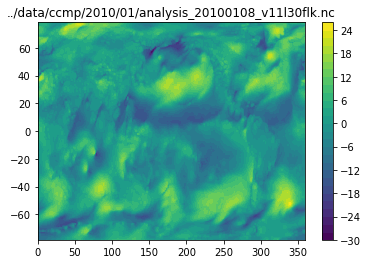

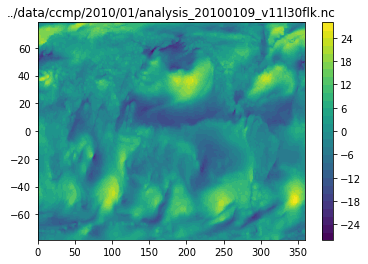

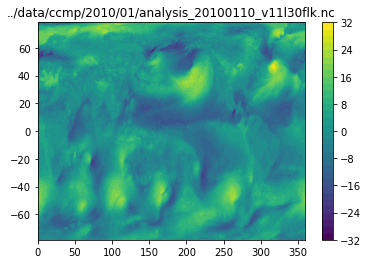

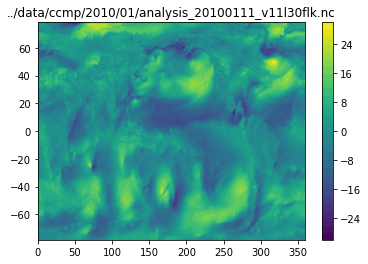

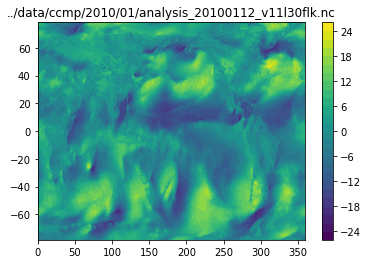

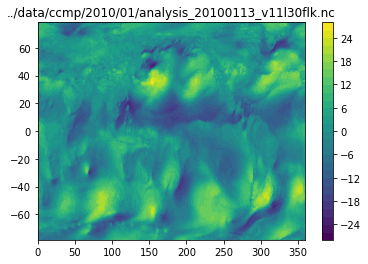

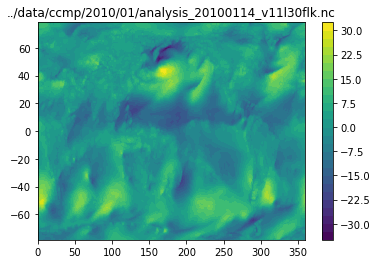

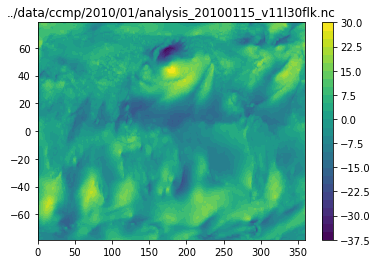

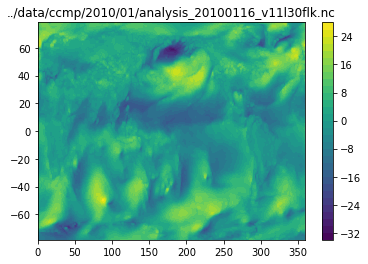

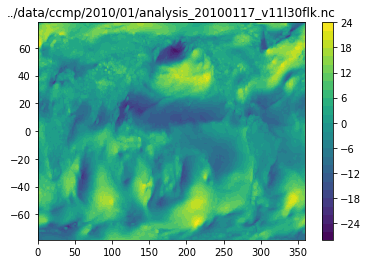

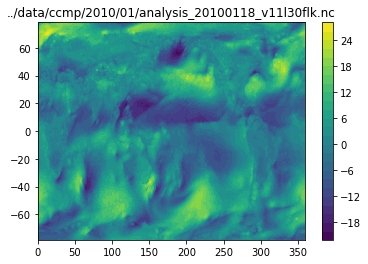

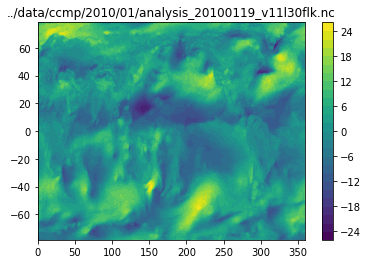

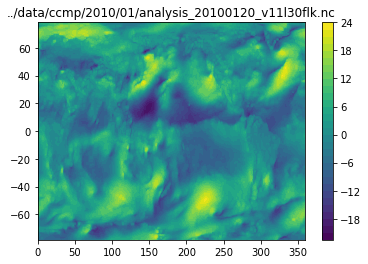

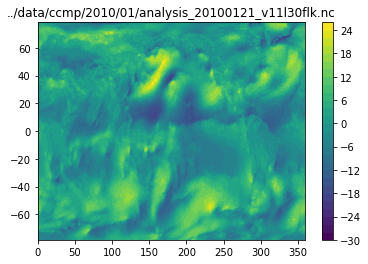

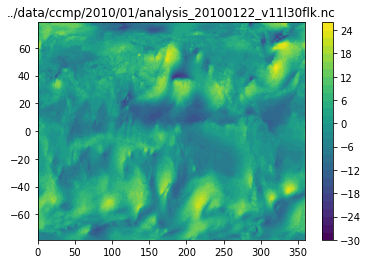

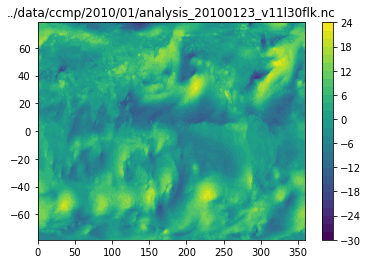

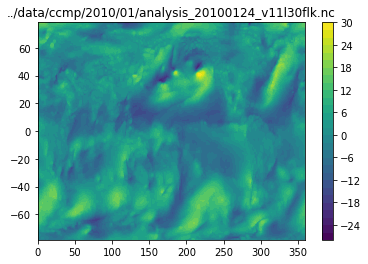

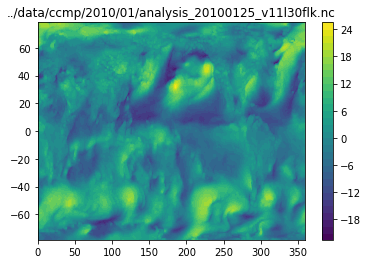

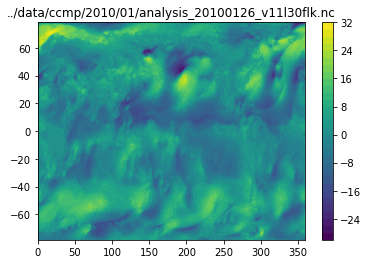

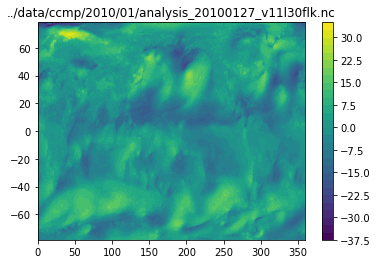

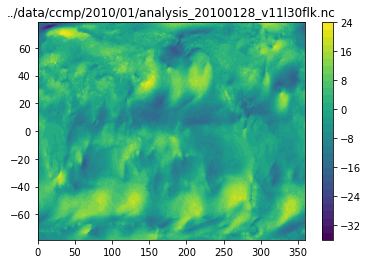

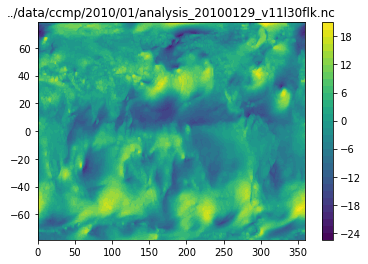

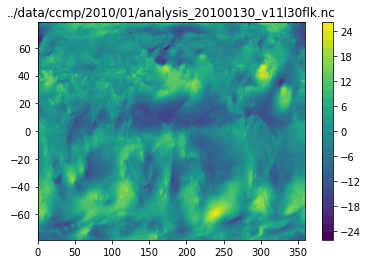

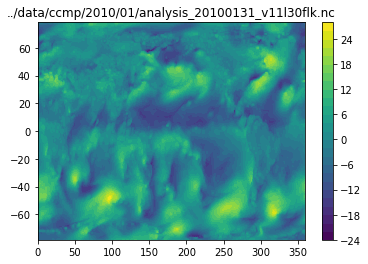

In [81]:
paths = glob.glob('../data/ccmp/2010/01/*.nc')

for f in paths:
    
    nc = Dataset(f,'r')
    uwnd = nc.variables['uwnd'][:]
    vwnd = nc.variables['vwnd'][:]
    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    U = (uwnd*2+vwnd*2)*1/2
    U_mean = np.ma.mean(U,axis= 0)
    plt.contourf(lon,lat,U_mean,30)
    plt.title(f)
    plt.colorbar()
    plt.show()
    

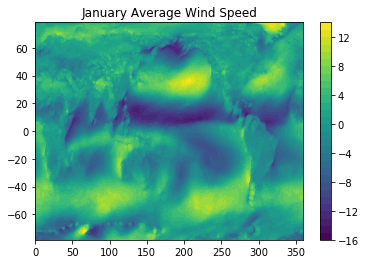

In [86]:
ncs = MFDataset(paths,'r')
uwnd = ncs.variables['uwnd'][:]
vwnd = ncs.variables['vwnd'][:]
lat = ncs.variables['lat'][:]
lon = ncs.variables['lon'][:]
U = (uwnd*2+vwnd*2)*1/2
U_mean = np.ma.mean(U,axis= 0)
plt.contourf(lon,lat,U_mean,30)
plt.title('January Average Wind Speed')
plt.colorbar()
